In [ ]:
import pandas as pd

# Create a synthetic dataset with CAD designs as references
data = {
    "room_length": [30, 30],  # Room dimensions
    "room_width": [30, 30],
    "bed_x": [5, 5],          # Bed position (x-coordinate)
    "bed_y": [25, 25],        # Bed position (y-coordinate)
    "table_x": [15, 20],      # Table position (x-coordinate)
    "table_y": [15, 10],      # Table position (y-coordinate)
    "tv_unit_x": [5, 5],      # TV unit position (x-coordinate) (aligned with bed_x)
    "tv_unit_y": [5, 5],      # TV unit position (y-coordinate)
    "cupboard_x": [15, 15],   # Cupboard position (x-coordinate)
    "cupboard_y": [28, 28]    # Cupboard position (y-coordinate)
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV for later use
df.to_csv("furniture_dataset.csv", index=False)

# Display the dataset
print("Dataset created:")
print(df)


Dataset created:
   room_length  room_width  bed_x  bed_y  table_x  table_y  tv_unit_x  \
0           30          30      5     25       15       15          5   
1           30          30      5     25       20       10          5   

   tv_unit_y  cupboard_x  cupboard_y  
0          5          15          28  
1          5          15          28  


In [ ]:
# Load the dataset
df = pd.read_csv("furniture_dataset.csv")

# Define a function to align TV unit with bed
def align_tv_with_bed(row):
    row['tv_unit_x'] = row['bed_x']  # Align TV unit's x-coordinate with bed's x-coordinate
    return row

# Apply the function to each row in the dataset
df_aligned = df.apply(align_tv_with_bed, axis=1)

# Save the updated dataset
df_aligned.to_csv("furniture_dataset_aligned.csv", index=False)

# Display the updated dataset
print("Updated dataset with aligned TV unit:")
print(df_aligned)


Updated dataset with aligned TV unit:
   room_length  room_width  bed_x  bed_y  table_x  table_y  tv_unit_x  \
0           30          30      5     25       15       15          5   
1           30          30      5     25       20       10          5   

   tv_unit_y  cupboard_x  cupboard_y  
0          5          15          28  
1          5          15          28  


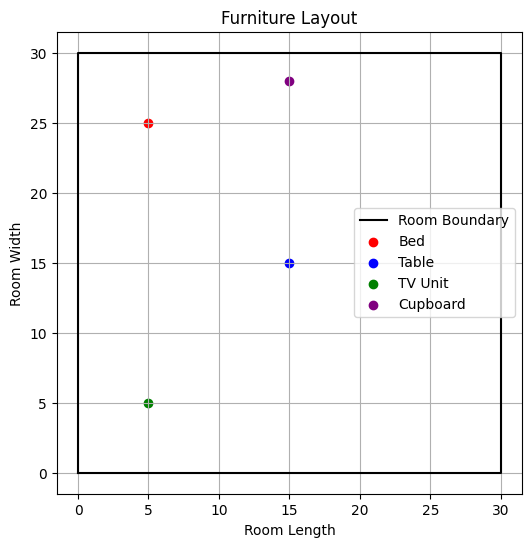

In [ ]:
import matplotlib.pyplot as plt

def visualize_layout(row):
    plt.figure(figsize=(6, 6))

    # Room boundary
    plt.plot([0, row["room_length"], row["room_length"], 0, 0],
             [0, 0, row["room_width"], row["room_width"], 0], 'k-', label="Room Boundary")

    # Furniture positions
    plt.scatter(row["bed_x"], row["bed_y"], c='red', label="Bed")
    plt.scatter(row["table_x"], row["table_y"], c='blue', label="Table")
    plt.scatter(row["tv_unit_x"], row["tv_unit_y"], c='green', label="TV Unit")
    plt.scatter(row["cupboard_x"], row["cupboard_y"], c='purple', label="Cupboard")

    plt.legend()
    plt.title("Furniture Layout")
    plt.xlabel("Room Length")
    plt.ylabel("Room Width")
    plt.grid()
    plt.show()

# Visualize the first layout in the updated dataset
visualize_layout(df_aligned.iloc[0])
